In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import pickle

In [2]:
df = pd.read_csv('/content/sample_data/california_housing_train.csv')
df = df.iloc[:,2:]
df

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...
16995,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [3]:
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = RobustScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
# Print according to the expected result
print('Jumlah baris dan kolom dari x_train adalah: \n', X_train.shape)
print('Jumlah baris dan kolom dari x_test adalah: \n', X_test.shape)

Jumlah baris dan kolom dari x_train adalah: 
 (13600, 6)
Jumlah baris dan kolom dari x_test adalah: 
 (3400, 6)


In [5]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
import math
def evaluate(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_all = model.predict(X)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    rmse = math.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2:', r2)

    df_comparison = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
    print(df_comparison)

In [6]:
evaluate(LGBMRegressor())

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001572 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1326
[LightGBM] [Info] Number of data points in the train set: 13600, number of used features: 6
[LightGBM] [Info] Start training from score 206707.856103
MAE: 46974.71875442827
MSE: 4232617569.3488464
RMSE: 65058.57029899171
R2: 0.6928177514621803
         y_test         y_pred
10941  142700.0  141514.676064
5250   500001.0  464992.588020
10292   61800.0  111598.004395
2266   162800.0  150109.110321
6398    90600.0  114201.691142
...         ...            ...
4706   211400.0  153965.754340
8404   500001.0  436957.549206
11114  162500.0  118482.750813
7877   360700.0  278658.556240
6188   137500.0  105898.637095

[3400 rows x 2 columns]


In [7]:
model = LGBMRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001294 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1326
[LightGBM] [Info] Number of data points in the train set: 13600, number of used features: 6
[LightGBM] [Info] Start training from score 206707.856103
Mean Squared Error: 4232617569.3488464
R-squared: 0.6928177514621803


In [8]:
with open('regresipickle.pkl', 'wb') as file:
    pickle.dump(model, file)

In [9]:
# Memuat model dari file
with open('regresipickle.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

df = pd.read_csv('/content/sample_data/california_housing_test.csv')
df = df.iloc[:,2:]
df = df.iloc[:,:-1]
# Menggunakan model yang dimuat untuk prediksi
y_pred_loaded = loaded_model.predict(df)
y_pred_loaded

df['harga'] = y_pred_loaded
df

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,harga
0,27.0,3885.0,661.0,1537.0,606.0,6.6085,536206.593704
1,43.0,1510.0,310.0,809.0,277.0,3.5990,533072.211996
2,27.0,3589.0,507.0,1484.0,495.0,5.7934,536206.593704
3,28.0,67.0,15.0,49.0,11.0,6.1359,536206.593704
4,19.0,1241.0,244.0,850.0,237.0,2.9375,523886.486841
...,...,...,...,...,...,...,...
2995,23.0,1450.0,642.0,1258.0,607.0,1.1790,428459.503483
2996,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,529821.414167
2997,10.0,956.0,201.0,693.0,220.0,2.2895,506853.347237
2998,40.0,96.0,14.0,46.0,14.0,3.2708,529821.414167


In [10]:
y_pred_loaded

array([536206.59370404, 533072.21199619, 536206.59370404, ...,
       506853.34723732, 529821.41416693, 536206.59370404])

In [11]:
df = pd.read_csv('/content/sample_data/california_housing_test.csv')
y_test_loaded = df.iloc[:,-1]
y_test_loaded

0       344700.0
1       176500.0
2       270500.0
3       330000.0
4        81700.0
          ...   
2995    225000.0
2996    237200.0
2997     62000.0
2998    162500.0
2999    500001.0
Name: median_house_value, Length: 3000, dtype: float64

In [12]:
df = pd.read_csv('/content/sample_data/california_housing_test.csv')
y_test_loaded = df.iloc[:,-1]
df = df.iloc[:,2:]
df = df.iloc[:,:-1]


# Menggunakan model yang dimuat untuk prediksi
y_pred_loaded = loaded_model.predict(df)

mse_loaded = mean_squared_error(y_test_loaded, y_pred_loaded)
r2_loaded = r2_score(y_test_loaded, y_pred_loaded)

print(f'Mean Squared Error (Loaded Model): {mse_loaded}')
print(f'R-squared (Loaded Model): {r2_loaded}')

df['harga'] = y_pred_loaded
df

Mean Squared Error (Loaded Model): 110249326773.094
R-squared (Loaded Model): -7.618751160252506


,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,harga
0,27.0,3885.0,661.0,1537.0,606.0,6.6085,536206.593704
1,43.0,1510.0,310.0,809.0,277.0,3.5990,533072.211996
2,27.0,3589.0,507.0,1484.0,495.0,5.7934,536206.593704
3,28.0,67.0,15.0,49.0,11.0,6.1359,536206.593704
4,19.0,1241.0,244.0,850.0,237.0,2.9375,523886.486841
...,...,...,...,...,...,...,...
2995,23.0,1450.0,642.0,1258.0,607.0,1.1790,428459.503483
2996,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,529821.414167
2997,10.0,956.0,201.0,693.0,220.0,2.2895,506853.347237
2998,40.0,96.0,14.0,46.0,14.0,3.2708,529821.414167


In [13]:
df_comparison = pd.DataFrame({'y_test': y_test_loaded, 'y_pred': y_pred_loaded,
                              'Selisih': y_test_loaded - y_pred_loaded,
                              'Persentase Selisih (%)': ((y_test_loaded - y_pred_loaded) / y_test_loaded) * 100})
print(df_comparison)

        y_test         y_pred        Selisih  Persentase Selisih (%)
0     344700.0  536206.593704 -191506.593704              -55.557468
1     176500.0  533072.211996 -356572.211996             -202.023916
2     270500.0  536206.593704 -265706.593704              -98.227946
3     330000.0  536206.593704 -206206.593704              -62.486847
4      81700.0  523886.486841 -442186.486841             -541.231930
...        ...            ...            ...                     ...
2995  225000.0  428459.503483 -203459.503483              -90.426446
2996  237200.0  529821.414167 -292621.414167             -123.364846
2997   62000.0  506853.347237 -444853.347237             -717.505399
2998  162500.0  529821.414167 -367321.414167             -226.043947
2999  500001.0  536206.593704  -36205.593704               -7.241104

[3000 rows x 4 columns]


In [14]:
df_comparison.describe()

,y_test,y_pred,Selisih,Persentase Selisih (%)
count,3000.00000,3000.000000,3000.000000,3000.000000
mean,205846.27500,520570.042164,-314723.767164,-238.531335
std,113119.68747,25751.863462,105839.553850,191.566217
min,22500.00000,348440.380731,-493072.211996,-1782.648246
25%,121200.00000,515074.505923,-390984.512539,-322.328583
50%,177650.00000,533072.211996,-342472.211996,-192.752505
75%,263975.00000,536206.593704,-263641.658854,-100.135013
max,500001.00000,536206.593704,91896.270118,18.379217


array([[<Axes: title={'center': 'y_test'}>,
        <Axes: title={'center': 'y_pred'}>],
       [<Axes: title={'center': 'Selisih'}>,
        <Axes: title={'center': 'Persentase Selisih (%)'}>]], dtype=object)

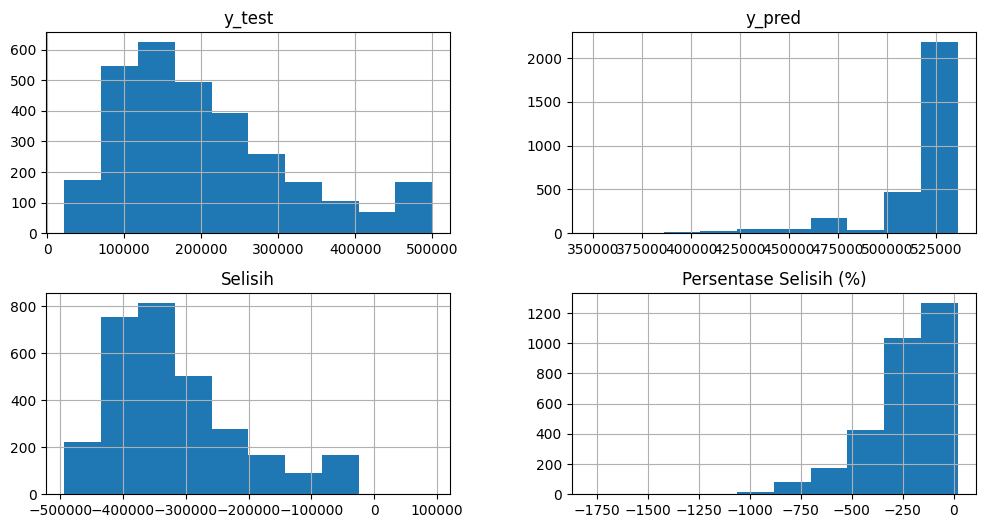

In [15]:
df_comparison.hist(figsize=(12,6))